# Zadanie: analiza danych

## Ładowanie bibliotek

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Przygotowanie danych

In [5]:
hr_data = pd.read_csv("HRDataset.csv")


# Funkcja konwersji daty z wymuszeniem lat XX wieku
def convert_to_20th_century(date):
    dt = pd.to_datetime(date, format="%m/%d/%y")
    if dt.year > 1999:
        dt = dt.replace(year=dt.year - 100)
    return dt


hr_data["DOB"] = hr_data["DOB"].apply(convert_to_20th_century)

hr_data["Age"] = 2024 - hr_data["DOB"].dt.year

# Mapowanie ocen wydajności na wartości liczbowe
score_mapping = {"Needs Improvement": 1, "Exceeds": 2, "PIP": 3, "Fully Meets": 4}
hr_data["PerformanceScoreNumeric"] = hr_data["PerformanceScore"].map(score_mapping)

## 1. Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?

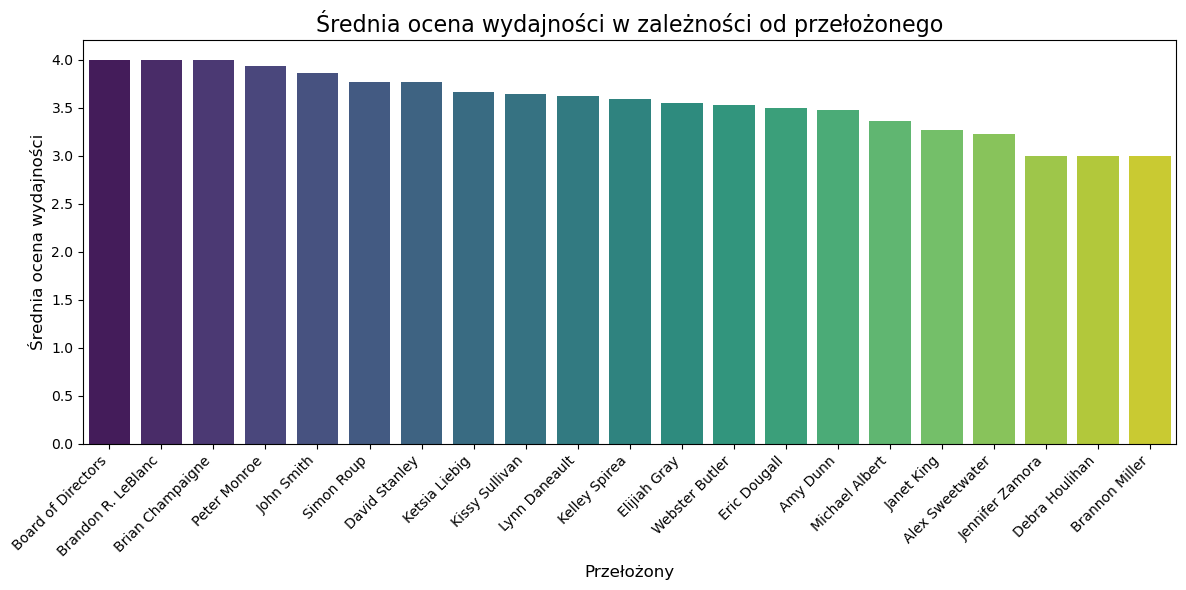



Średnia ocena zależy od przełożonego, ale zmienność tej zmiennej nie jest duża.


In [7]:
manager_scores = (
    hr_data.groupby("ManagerName")["PerformanceScoreNumeric"].mean().reset_index()
)
manager_scores = manager_scores.sort_values(
    by="PerformanceScoreNumeric", ascending=False
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=manager_scores,
    x="ManagerName",
    y="PerformanceScoreNumeric",
    hue="ManagerName",
    palette="viridis",
    legend=False,
)
plt.xticks(rotation=45, ha="right")
plt.title("Średnia ocena wydajności w zależności od przełożonego", fontsize=16)
plt.xlabel("Przełożony", fontsize=12)
plt.ylabel("Średnia ocena wydajności", fontsize=12)
plt.tight_layout()
plt.show()
print(
    f"\n\nŚrednia ocena zależy od przełożonego, ale zmienność tej zmiennej nie jest duża."
)

## 2. Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

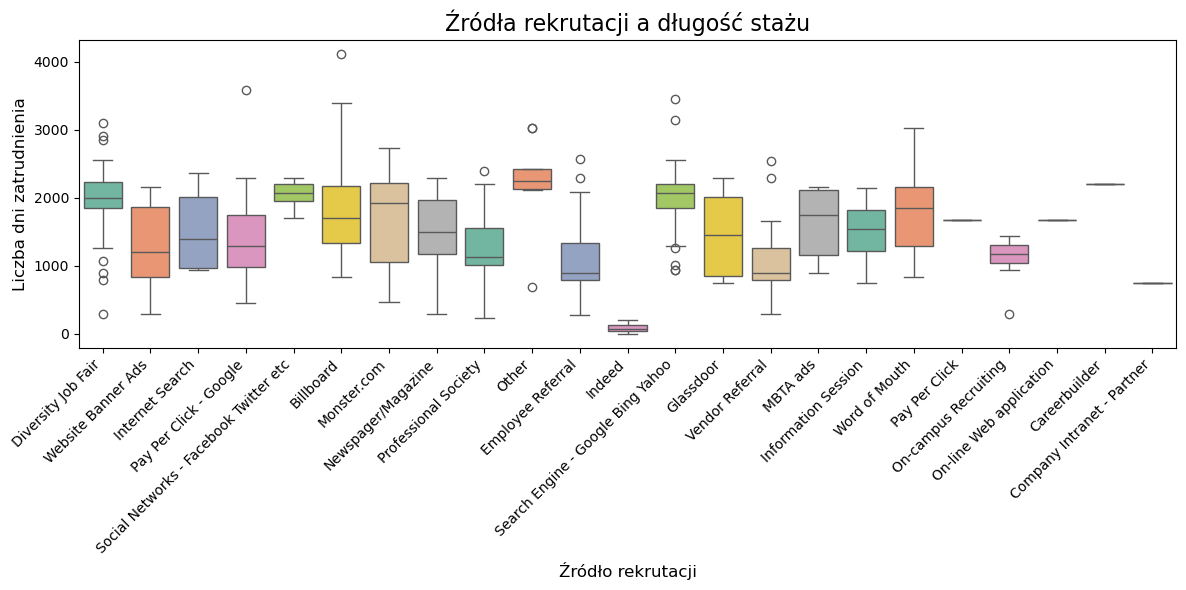



Nieuwzględniając liczby pracowników zatrudnionych z danego źródła, można stwierdzić, że najdłużej pracują osoby zatrudnione dzięki mediom społecznościowym, wyszukiwarkom internetowym i innym źródłom pozyskania.


In [9]:
hr_data["DaysEmployed"] = pd.to_datetime(hr_data["DateofHire"]).max() - pd.to_datetime(
    hr_data["DateofHire"]
)
hr_data["DaysEmployed"] = hr_data["DaysEmployed"].dt.days

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=hr_data,
    x="RecruitmentSource",
    y="DaysEmployed",
    hue="RecruitmentSource",
    palette="Set2",
    dodge=False,
)
plt.xticks(rotation=45, ha="right")
plt.title("Źródła rekrutacji a długość stażu", fontsize=16)
plt.xlabel("Źródło rekrutacji", fontsize=12)
plt.ylabel("Liczba dni zatrudnienia", fontsize=12)
plt.legend([], [], frameon=False)  # Wyłącz legendę
plt.tight_layout()
plt.show()
print(
    f"\n\nNieuwzględniając liczby pracowników zatrudnionych z danego źródła, można stwierdzić, że najdłużej pracują osoby zatrudnione dzięki mediom społecznościowym, wyszukiwarkom internetowym i innym źródłom pozyskania."
)

## 3. Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

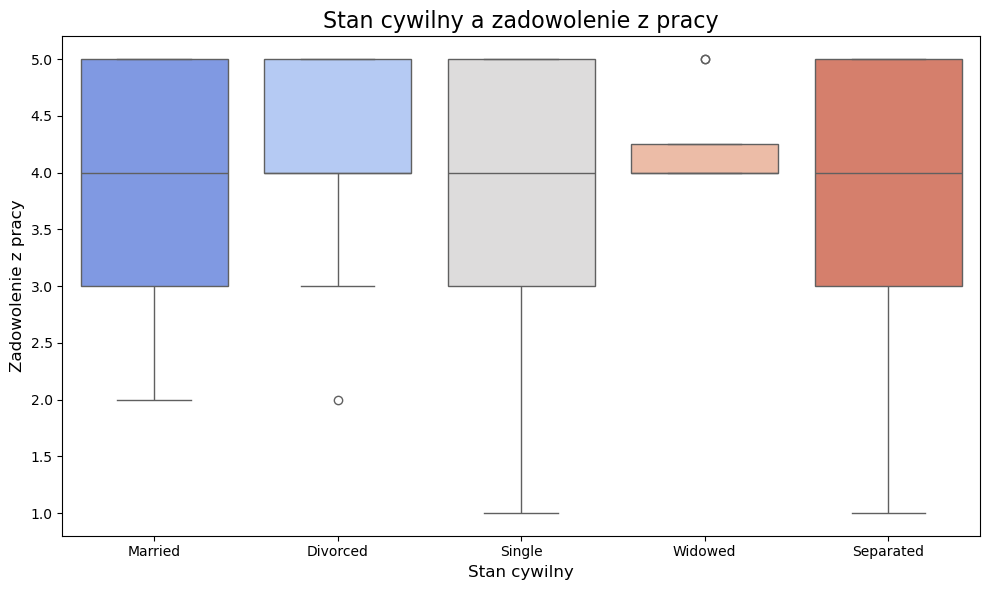



Nie, nie ma korelacja między tymi zmiennymi.


In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=hr_data,
    x="MaritalDesc",
    y="EmpSatisfaction",
    hue="MaritalDesc",
    palette="coolwarm",
    dodge=False,
)
plt.title("Stan cywilny a zadowolenie z pracy", fontsize=16)
plt.xlabel("Stan cywilny", fontsize=12)
plt.ylabel("Zadowolenie z pracy", fontsize=12)
plt.legend([], [], frameon=False)  # Wyłącz legendę
plt.tight_layout()
plt.show()

print(f"\n\nNie, nie ma korelacja między tymi zmiennymi.")

## Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

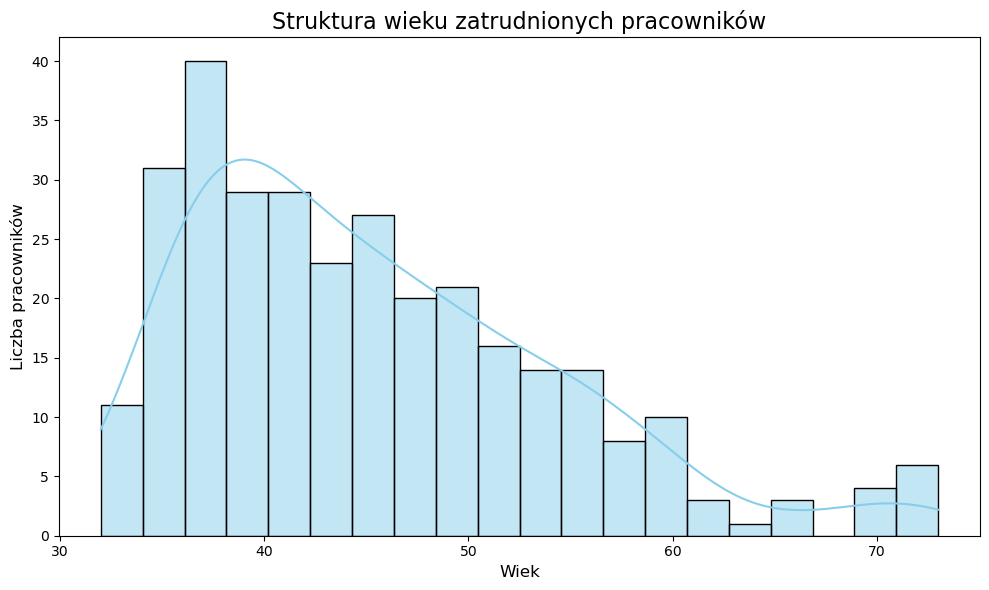

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(hr_data["Age"], kde=True, bins=20, color="skyblue", edgecolor="black")
plt.title("Struktura wieku zatrudnionych pracowników", fontsize=16)
plt.xlabel("Wiek", fontsize=12)
plt.ylabel("Liczba pracowników", fontsize=12)
plt.tight_layout()
plt.show()

## 5. Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

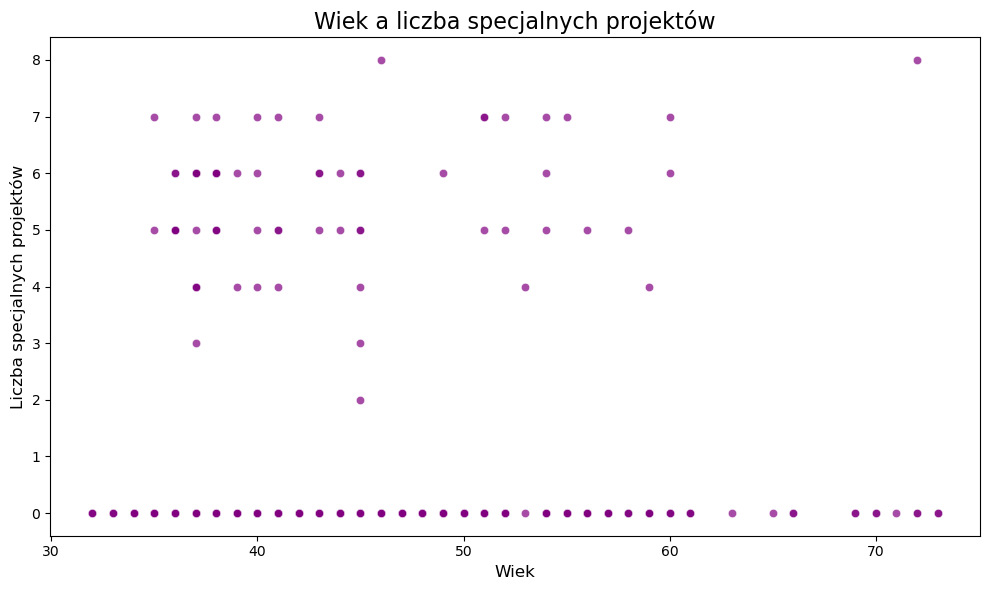



Nie, wręcz odwrotnie, to młodsi robią więcej projektów specjalnych.


In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=hr_data, x="Age", y="SpecialProjectsCount", alpha=0.7, color="purple"
)
plt.title("Wiek a liczba specjalnych projektów", fontsize=16)
plt.xlabel("Wiek", fontsize=12)
plt.ylabel("Liczba specjalnych projektów", fontsize=12)
plt.tight_layout()
plt.show()

print(f"\n\nNie, wręcz odwrotnie, to młodsi robią więcej projektów specjalnych.")